# Model the growth in number of rides per day in Boston

In [282]:
import pandas as pd
from sklearn import linear_model
from sklearn import cross_validation
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import numpy as np

In [250]:
ridedata = pd.read_csv('../Data/Boston/BostonFeatures.csv')

In [264]:
ridestation = ridedata[ridedata['stationid'] == 3]
ridestation = ridestation[ridestation['nrides'] > 5]

In [265]:
y = ridestation['nrides'].values

In [272]:
ridestation

,Unnamed: 0,start_day,stationid,duration,nrides,deltayear,dayofweek,dayofyear,PRCP,SNOW,TMAX,TMIN,Unnamed: 0.1,lat,lng,density
0,0,2011-07-28,3,641.0,8,0,3,209,0.0,0,278.0,153.0,0,42.340021,-71.100812,3.035066e+08
1,1,2011-07-29,3,203.5,6,0,4,210,0.0,0,267.0,172.0,0,42.340021,-71.100812,3.035066e+08
4,4,2011-08-01,3,963.5,8,0,0,213,0.0,0,322.0,189.0,0,42.340021,-71.100812,3.035066e+08
6,6,2011-08-03,3,617.0,6,0,2,215,20.0,0,300.0,150.0,0,42.340021,-71.100812,3.035066e+08
7,7,2011-08-04,3,1003.5,6,0,3,216,0.0,0,256.0,167.0,0,42.340021,-71.100812,3.035066e+08
8,8,2011-08-05,3,635.5,14,0,4,217,0.0,0,256.0,161.0,0,42.340021,-71.100812,3.035066e+08
11,11,2011-08-08,3,896.0,11,0,0,220,240.0,0,267.0,206.0,0,42.340021,-71.100812,3.035066e+08
12,12,2011-08-09,3,686.0,11,0,1,221,74.0,0,272.0,183.0,0,42.340021,-71.100812,3.035066e+08
13,13,2011-08-10,3,846.0,8,0,2,222,381.0,0,261.0,178.0,0,42.340021,-71.100812,3.035066e+08
14,14,2011-08-11,3,917.0,18,0,3,223,0.0,0,267.0,161.0,0,42.340021,-71.100812,3.035066e+08


In [276]:
ridefeatures = ridestation.drop(['nrides', 'start_day', 'dayofyear', 'deltayear', 'Unnamed: 0', 'lat', 'lng','duration','stationid'], axis=1)

In [283]:
ridefeatures['stationage'] = np.arange(len(ridefeatures))

In [284]:
X = ridefeatures.values
scaler = preprocessing.StandardScaler().fit(X)
Xt = scaler.transform(X)

In [288]:
X

array([[3, 0.0, 0.0, ..., 0, 303506620.52022386, 0],
       [4, 0.0, 0.0, ..., 0, 303506620.52022386, 1],
       [0, 0.0, 0.0, ..., 0, 303506620.52022386, 2],
       ..., 
       [5, 43.0, 0.0, ..., 0, 303506620.52022386, 552],
       [0, 0.0, 0.0, ..., 0, 303506620.52022386, 553],
       [1, 0.0, 0.0, ..., 0, 303506620.52022386, 554]], dtype=object)

In [285]:
clf = linear_model.LinearRegression()
#clf.fit(X_train, y_train)
#clf.coef_
#clf.score(X_test, y_test)
scores = cross_validation.cross_val_score(clf, Xt, y, cv=5, scoring='median_absolute_error')

In [286]:
scores, scores.mean(), scores.std()

(array([-3.91507043, -4.16420343, -3.60611093, -4.34448759, -4.57672617]),
 -4.1213197088602627,
 0.33675415784490348)

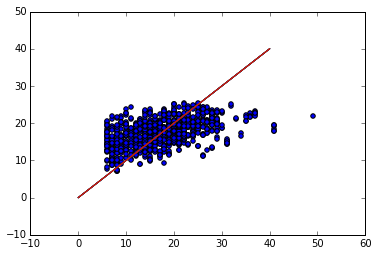

In [287]:
for isim in range(10):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
         Xt, y, test_size=0.2)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    plt.scatter(y_test, y_pred)
    plt.plot([0,40], [0,40])

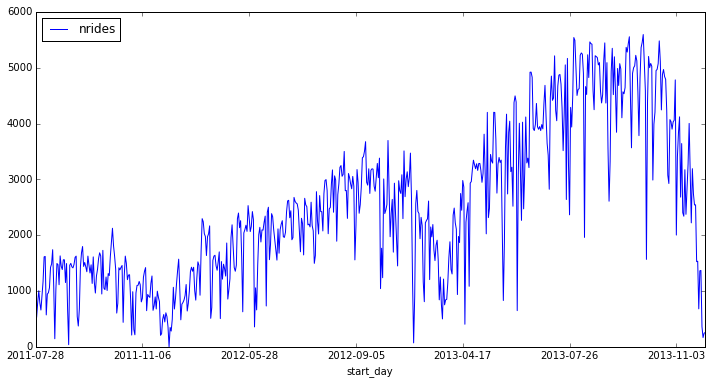

In [44]:
ridedata.plot(x='start_day', y='nrides', figsize=(12,6))